In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sqlalchemy import create_engine


# Replace with your SQL Server connection details
server = 'localhost\\SQLEXPRESS'
database = 'prj0138'

# For trusted connection using Windows authentication
# Use driver='ODBC Driver 17 for SQL Server' if needed
#conn_str = f'mssql+pyodbc://{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+18+for+SQL+Server'
conn_str = f'mssql+pyodbc://{server}/{database}?trusted_connection=yes&driver=SQL+Server'

engine = create_engine(conn_str)

In [3]:
person = pd.read_sql("""Select * from [prj0138].[CUMC\\shj4017].[final_person];
                       """,engine)

In [4]:
person

,person_id,gender_concept_id,year_of_birth,month_of_birth,day_of_birth,race_concept_id,ethnicity_concept_id,state,marital_status_concept_id,education_level_concept_id,income_level_concept_id,insurance_type
0,1,8507,2004,1,9,8527,38003564,OH,9000003,9000013,9000020,Medicaid
1,2,8532,1961,9,8,8527,38003563,NY,9000002,9000013,9000022,Medicaid
2,3,8507,1975,5,24,8527,38003564,WA,9000002,9000010,9000022,Medicaid
3,4,8532,1961,5,20,8527,38003563,IL,9000004,9000013,9000024,Medicaid
4,5,8532,1994,3,20,8516,38003563,IL,9000002,9000014,9000020,Uninsured
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,8507,1971,6,18,8527,38003564,OH,9000003,9000012,9000023,Medicare
2996,2997,8532,1989,1,25,8527,38003563,TX,9000002,9000010,9000020,Medicaid
2997,2998,8507,1991,12,26,8516,38003563,FL,9000001,9000010,9000020,Medicaid
2998,2999,8507,1987,5,9,8516,38003563,CA,9000001,9000010,9000020,Private


In [5]:
concept = pd.read_sql("""Select * from [prj0138].[CUMC\\shj4017].[final_concept];
                       """,engine)

In [6]:
concept

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
0,8507,Female,Gender,Gender,Gender,S,F,2000-01-01,2099-12-31,None
1,8516,White,Race,Race,Race,S,2106-3,2000-01-01,2099-12-31,None
2,8527,Asian,Race,Race,Race,S,2028-9,2000-01-01,2099-12-31,None
3,8532,Male,Gender,Gender,Gender,S,M,2000-01-01,2099-12-31,None
4,8576,Milligram,Unit,UCUM,Mass Unit,S,mg,2000-01-01,2099-12-31,None
5,31967,Major depressive disorder,Condition,SNOMED,Clinical Finding,S,F32.9,2000-01-01,2099-12-31,None
6,201826,Type 2 diabetes mellitus,Condition,SNOMED,Clinical Finding,S,E11,2000-01-01,2099-12-31,None
7,1125315,Fluoxetine 20mg,Drug,RxNorm,Ingredient,S,198440,2000-01-01,2099-12-31,None
8,4132161,Oral route,Route,SNOMED,Route of Administration,S,26643006,2000-01-01,2099-12-31,None
9,9000001,Unknown,MaritalStatus,Custom,Category,S,MS0,2000-01-01,2099-12-31,None


In [7]:
drug_exposure = pd.read_sql("""Select * from [prj0138].[CUMC\\shj4017].[final_drug_exposure];
                       """,engine)
drug_exposure

,drug_exposure_id,person_id,drug_concept_id,drug_exposure_start_date,drug_exposure_end_date,drug_type_concept_id,dose_quantity,dose_unit_concept_id,route_concept_id,frequency,source_value
0,2,2,1125315,2023-07-01,2023-09-01,38000177,20.0,8576,4132161,Daily,Fluoxetine 20mg
1,4,4,1125315,2023-07-01,2023-09-01,38000177,20.0,8576,4132161,Daily,Fluoxetine 20mg
2,5,5,1125315,2023-07-01,2023-09-01,38000177,20.0,8576,4132161,Daily,Fluoxetine 20mg
3,6,6,1125315,2023-07-01,2023-09-01,38000177,20.0,8576,4132161,Daily,Fluoxetine 20mg
4,10,10,1125315,2023-07-01,2023-09-01,38000177,20.0,8576,4132161,Daily,Fluoxetine 20mg
...,...,...,...,...,...,...,...,...,...,...,...
1828,2990,2990,1125315,2023-07-01,2023-09-01,38000177,20.0,8576,4132161,Daily,Fluoxetine 20mg
1829,2992,2992,1125315,2023-07-01,2023-09-01,38000177,20.0,8576,4132161,Daily,Fluoxetine 20mg
1830,2993,2993,1125315,2023-07-01,2023-09-01,38000177,20.0,8576,4132161,Daily,Fluoxetine 20mg
1831,2999,2999,1125315,2023-07-01,2023-09-01,38000177,20.0,8576,4132161,Daily,Fluoxetine 20mg


In [8]:
observation = pd.read_sql("""Select * from [prj0138].[CUMC\\shj4017].[final_observation];
                       """,engine)
observation

,observation_id,person_id,observation_concept_id,observation_date,observation_time,value_as_concept_id,value_as_string,observation_type_concept_id,source_value,visit_occurrence_id
0,2,2,43020454,2023-07-30,10:00:00.0000000,0,None,44814721,Suicidal Thoughts,1564
1,4,4,43020454,2023-07-26,10:00:00.0000000,0,None,44814721,Suicidal Thoughts,1380
2,5,5,43020454,2023-07-20,10:00:00.0000000,0,Occasionally,44814721,Suicidal Thoughts,1770
3,6,6,43020454,2023-06-30,10:00:00.0000000,1,Frequently,44814721,Suicidal Thoughts,1476
4,10,10,43020454,2023-06-27,10:00:00.0000000,1,None,44814721,Suicidal Thoughts,1186
...,...,...,...,...,...,...,...,...,...,...
1828,2990,2990,43020454,2023-06-21,10:00:00.0000000,1,None,44814721,Suicidal Thoughts,1321
1829,2992,2992,43020454,2023-06-08,10:00:00.0000000,0,Frequently,44814721,Suicidal Thoughts,1233
1830,2993,2993,43020454,2023-07-15,10:00:00.0000000,0,Frequently,44814721,Suicidal Thoughts,1531
1831,2999,2999,43020454,2023-07-19,10:00:00.0000000,0,Occasionally,44814721,Suicidal Thoughts,1886


In [9]:
measurement = pd.read_sql("""Select * from [prj0138].[CUMC\\shj4017].[final_measurement];
                       """,engine)
measurement

,measurement_id,person_id,measurement_concept_id,measurement_date,measurement_time,value_as_number,unit_concept_id,measurement_type_concept_id,source_value,visit_occurrence_id
0,2,2,44818822,2023-07-24,09:00:00.0000000,6.0,None,44818702,PHQ-9,1363
1,4,4,44818822,2023-06-17,09:00:00.0000000,11.0,None,44818702,PHQ-9,1427
2,5,5,44818822,2023-07-12,09:00:00.0000000,10.0,None,44818702,PHQ-9,1438
3,6,6,44818822,2023-07-26,09:00:00.0000000,15.0,None,44818702,PHQ-9,1969
4,10,10,44818822,2023-07-15,09:00:00.0000000,25.0,None,44818702,PHQ-9,1710
...,...,...,...,...,...,...,...,...,...,...
1828,2990,2990,44818822,2023-06-30,09:00:00.0000000,24.0,None,44818702,PHQ-9,1622
1829,2992,2992,44818822,2023-07-02,09:00:00.0000000,23.0,None,44818702,PHQ-9,1818
1830,2993,2993,44818822,2023-06-16,09:00:00.0000000,11.0,None,44818702,PHQ-9,1163
1831,2999,2999,44818822,2023-07-21,09:00:00.0000000,21.0,None,44818702,PHQ-9,1774


In [10]:
condition_occurrence = pd.read_sql("""Select * from [prj0138].[CUMC\\shj4017].[final_condition_occurrence];
                       """,engine)
condition_occurrence

,condition_occurrence_id,person_id,condition_concept_id,condition_start_date,condition_end_date,condition_type_concept_id,provider_id,visit_occurrence_id,condition_status_concept_id,source_value
0,1,1,201826,2023-10-13,None,32020,140,1757,2,E11
1,2,2,31967,2023-06-15,None,32020,147,1613,2,F32.9
2,3,3,201826,2023-07-20,None,32020,116,1648,1,E11
3,4,4,31967,2023-12-22,None,32020,180,1427,3,F32.9
4,5,5,40379000,2023-01-24,None,32020,104,1107,1,F41.1
...,...,...,...,...,...,...,...,...,...,...
2995,2996,2996,201826,2023-07-06,None,32020,156,1340,1,E11
2996,2997,2997,201826,2023-09-25,None,32020,189,1840,3,E11
2997,2998,2998,201826,2023-10-09,None,32020,199,1808,2,E11
2998,2999,2999,40379000,2023-08-13,None,32020,174,1317,1,F41.1


In [11]:
mental_health = pd.read_sql("""Select * from [prj0138].[CUMC\\row4007].[mental_health_data];
                       """,engine)
mental_health

,FIPS,State,County,pct_Frequent_Mental_Distress,95pct_CI___Low,95pct_CI___High,num_Deaths,Suicide_Rate_Age_Adjusted,95pct_CI___Low.1,95pct_CI___High.1,...,num_Non_Hispanic_White,pct_Non_Hispanic_White,num_Not_Proficient_in_English,pct_Not_Proficient_in_English,95pct_CI___Low.2,95pct_CI___High.2,pct_Female,num_Rural_Residents,pct_Rural,Year
0,1000,Alabama,None,16.484296,15.101351,17.967086,4043.0,16.200670,15.687356,16.713984,...,3269726,64.877099,48318,1.027596,0.972899,1.082293,51.425422,1957932.0,40.963183,2023
1,1001,Alabama,Autauga,16.200000,15.100000,17.500000,52.0,17.737296,13.164963,23.384414,...,42817,72.454522,127,0.231241,0.000000,0.606790,51.378289,22921.0,42.002162,2023
2,1003,Alabama,Baldwin,16.100000,14.800000,17.400000,214.0,19.645883,16.898047,22.393719,...,198970,83.148763,1634,0.759661,0.509760,1.009561,51.347715,77060.0,42.279099,2023
3,1005,Alabama,Barbour,18.000000,17.000000,18.900000,20.0,14.267052,8.455559,22.548094,...,11310,45.305240,331,1.382681,0.529227,2.236135,46.703253,18613.0,67.789635,2023
4,1007,Alabama,Bibb,17.400000,16.400000,18.400000,18.0,17.422736,10.325817,27.535434,...,16535,73.564088,94,0.443062,0.000000,1.128412,46.015927,15663.0,68.352607,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12767,56037,Wyoming,Sweetwater,10.999999,10.710652,11.309359,47.0,22.299100,16.202560,29.935501,...,34145,79.312908,669,1.633221,0.993813,2.272629,48.544749,4782.0,10.916313,2020
12768,56039,Wyoming,Teton,10.322181,10.011163,10.607708,15.0,12.095214,6.612566,20.293713,...,18812,81.504268,945,4.314477,2.787340,5.841615,48.403449,9887.0,46.430920,2020
12769,56041,Wyoming,Uinta,11.902582,11.570095,12.270798,21.0,22.189012,13.553625,34.269130,...,17741,87.398394,133,0.696080,0.000000,1.429709,49.332479,9101.0,43.095937,2020
12770,56043,Wyoming,Washakie,11.718519,11.389687,12.072372,NaN,NaN,NaN,NaN,...,6498,82.409639,25,0.324886,0.000000,1.376766,49.422955,3068.0,35.954529,2020


In [12]:
crimes_Against_offenses = pd.read_sql("""Select * from [prj0138].[CUMC\\shj4017].[crimes_Against_offenses];
                       """,engine)
crimes_Against_offenses

,State,Number of Participating Agencies,Population Covered,Total Persons Offenses,Assault Offenses,Homicide Offenses,Human Trafficking,Kidnapping/ Abduction,Sex Offenses,Year,...,Motor Vehicle Theft,Robbery,Stolen Property Offenses,Total Society Offenses,Animal Cruelty,Drug/ Narcotic Offenses,Gambling Offenses,Pornography/ Obscene Material,Prostitution Offenses,Weapon Law Violations
0,Alabama,131,715130,4384,4214,24,0,52,94,2020,...,541,66,156,3235,43,2903,1,11,0,277
1,Alabama,356,3734077,70855,68366,381,18,388,1702,2021,...,9902,1481,1576,30075,351,25687,13,286,39,3699
2,Alabama,404,4519862,76654,73898,482,36,338,1900,2022,...,8757,1513,2208,49895,607,43361,25,668,77,5157
3,Alabama,408,4715066,78833,75860,466,68,323,2116,2023,...,9036,1624,2098,44159,646,40674,37,593,81,2128
4,Alaska,30,402557,6858,5945,31,2,29,851,2021,...,611,72,31,1730,20,1229,0,36,18,427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Wisconsin,383,5743277,50799,44509,386,112,1123,4669,2023,...,9895,2290,1231,62349,384,48433,2,1453,283,11794
196,Wyoming,23,200308,1213,1085,2,1,18,107,2020,...,74,6,8,855,29,803,0,7,2,14
197,Wyoming,47,450309,5867,5202,33,13,68,551,2021,...,851,47,22,4094,75,3750,0,95,17,157
198,Wyoming,50,453931,6105,5495,27,13,67,503,2022,...,629,32,17,3884,89,3506,0,133,12,144


In [13]:
Annual_summary_statistics = pd.read_sql("""Select * from [prj0138].[CUMC\\shj4017].[Annual_summary_statistics];
                       """,engine)
Annual_summary_statistics

,GeoFips,GeoName,LineCode,Category,Description,1998,1999,2000,2001,2002,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,0,United States,1,Real dollar statistics,Real GDP (millions of chained 2017 dollars) 1,12924876,13543774,14096033,14230726,14472712,...,18799622,19141672,19612102,20193896,20715671,20267585,21494798,22034828,22671096,23305023
1,0,United States,2,Real dollar statistics,Real personal income (millions of constant (...,(NA),(NA),(NA),(NA),(NA),...,1.58964e+007,1.6162e+007,16658962,17163074,17727562,1.87316e+007,1.96417e+007,19013960,1.94041e+007,(NA)
2,0,United States,3,Real dollar statistics,Real PCE (millions of constant (2017) dollar...,(NA),(NA),(NA),(NA),(NA),...,12638789,1.2949e+007,1.32906e+007,1.36549e+007,13948133,1.35947e+007,1.47872e+007,1.52362e+007,1.56217e+007,(NA)
3,0,United States,4,Current dollar statistics (millions of dollars),Gross domestic product (GDP),9062817,9631172,10250952,10581929,10929108,...,18295019,18804913,19612102,20656516,21539982,21354105,23681171,26006893,27720709,29184890
4,0,United States,5,Current dollar statistics (millions of dollars),Personal income,7584003,7978449,8620234,8990104,9146700,...,15467113,15884741,16658962,17514402,18349584,19600945,21403979,22077232,23380269,2.46327e+007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,56000,Wyoming,11,Per capita current dollar statistics,Per capita disposable personal income 7,22463,23898,25465,27252,28577,...,50083,48094,50609,53616,55690,58208,62192,65665,72574,76056
776,56000,Wyoming,12,Per capita current dollar statistics,Per capita personal consumption expenditures...,20184,21566,22979,23867,24616,...,39651,40450,41472,42890,43916,44408,49298,53869,56941,(NA)
777,56000,Wyoming,13,Price indexes,Regional price parities (RPPs) 9,(NA),(NA),(NA),(NA),(NA),...,96.972,97.747,97.185,92.345,94.12,91.831,91.533,91.761,90.848,(NA)
778,56000,Wyoming,14,Price indexes,Implicit regional price deflator 10,(NA),(NA),(NA),(NA),(NA),...,94.353,96.07,97.185,94.236,97.423,96.093,99.745,106.544,109.464,(NA)


In [14]:
Edu_Level_Survey = pd.read_sql("""Select * from [prj0138].[CUMC\\shj4017].[Edu_Level_Survey];
                       """,engine)
Edu_Level_Survey

,GEO_ID,NAME,S1501_C01_001E,S1501_C01_001M,S1501_C01_002E,S1501_C01_002M,S1501_C01_003E,S1501_C01_003M,S1501_C01_004E,S1501_C01_004M,...,S1501_C06_060M,S1501_C06_061E,S1501_C06_061M,S1501_C06_062E,S1501_C06_062M,S1501_C06_063E,S1501_C06_063M,S1501_C06_064E,S1501_C06_064M,Year
0,0400000US01,Alabama,468319,5125,70992.0,4881.0,149612.0,5667.0,212684.0,6093.0,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),2015
1,0400000US01,Alabama,463070,4595,63369.0,4435.0,148705.0,6569.0,218092.0,6157.0,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),2016
2,0400000US01,Alabama,471079,5556,63810.0,5003.0,161311.0,6371.0,214751.0,6848.0,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),2017
3,0400000US01,Alabama,461302,5123,61166.0,4682.0,161286.0,6878.0,202178.0,7159.0,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),2018
4,0400000US01,Alabama,457530,5551,56454.0,4838.0,158761.0,7166.0,207319.0,7341.0,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,0400000US72,Puerto Rico,313113,2377,28022.0,2624.0,84923.0,5293.0,169807.0,6455.0,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),2018
412,0400000US72,Puerto Rico,319225,2953,28658.0,3228.0,84181.0,4774.0,171326.0,5314.0,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),2019
413,0400000US72,Puerto Rico,316387,3492,22575.0,2623.0,86786.0,5518.0,176214.0,6268.0,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),2021
414,0400000US72,Puerto Rico,299015,3575,21535.0,2531.0,85926.0,4455.0,156931.0,5090.0,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),2022


In [15]:
Edu_Level_Survey_5_years = pd.read_sql("""Select * from [prj0138].[CUMC\\shj4017].[Edu_Level_Survey_5_years];
                       """,engine)
Edu_Level_Survey_5_years

,GEO_ID,NAME,S1501_C01_001E,S1501_C01_001M,S1501_C01_002E,S1501_C01_002M,S1501_C01_003E,S1501_C01_003M,S1501_C01_004E,S1501_C01_004M,...,S1501_C06_060M,S1501_C06_061E,S1501_C06_061M,S1501_C06_062E,S1501_C06_062M,S1501_C06_063E,S1501_C06_063M,S1501_C06_064E,S1501_C06_064M,Year
0,0400000US01,Alabama,479295,1152,77561.0,2057.0,145515.0,2483.0,221100.0,2610.0,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),2015
1,0400000US01,Alabama,474567,1090,74167.0,2054.0,146337.0,2620.0,219193.0,2930.0,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),2016
2,0400000US01,Alabama,471452,936,69979.0,1989.0,150607.0,2566.0,216722.0,2958.0,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),2017
3,0400000US01,Alabama,465929,1086,65096.0,2074.0,152557.0,2860.0,214231.0,2844.0,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),2018
4,0400000US01,Alabama,458997,1269,60057.0,1591.0,152515.0,2729.0,211825.0,2224.0,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,0400000US72,Puerto Rico,324142,446,29391.0,1363.0,88987.0,2291.0,176952.0,2809.0,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),2019
464,0400000US72,Puerto Rico,313188,254,27455.0,1436.0,83821.0,2186.0,172131.0,2169.0,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),2020
465,0400000US72,Puerto Rico,314885,434,25919.0,1473.0,83101.0,2146.0,174927.0,2528.0,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),2021
466,0400000US72,Puerto Rico,305813,553,23485.0,1309.0,81057.0,2344.0,169085.0,2740.0,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),2022


In [16]:
Edu_Survey_des = pd.read_sql("""Select * from [prj0138].[CUMC\\shj4017].[Edu_Survey_des];
                       """,engine)
Edu_Survey_des

,Column Name,Label
0,GEO_ID,Geography
1,NAME,Geographic Area Name
2,S1501_C01_001E,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...
3,S1501_C01_001M,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...
4,S1501_C01_002E,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...
...,...,...
765,S1501_C06_062M,Margin of Error!!Percent Female!!MEDIAN EARNIN...
766,S1501_C06_063E,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...
767,S1501_C06_063M,Margin of Error!!Percent Female!!MEDIAN EARNIN...
768,S1501_C06_064E,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...


In [17]:
Edu_Survey_5_years_des = pd.read_sql("""Select * from [prj0138].[CUMC\\shj4017].[Edu_Survey_5_years_des];
                       """,engine)
Edu_Survey_5_years_des

,Column Name,Label
0,GEO_ID,Geography
1,NAME,Geographic Area Name
2,S1501_C01_001E,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...
3,S1501_C01_001M,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...
4,S1501_C01_002E,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...
...,...,...
765,S1501_C06_062M,Margin of Error!!Percent Female!!MEDIAN EARNIN...
766,S1501_C06_063E,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...
767,S1501_C06_063M,Margin of Error!!Percent Female!!MEDIAN EARNIN...
768,S1501_C06_064E,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...


In [18]:
mental_health_df = pd.read_sql("""
-- Revised: Aggregate mental health indicators by state
SELECT 
    p.state,
    -- PHQ-9 scores (depression screening)
    AVG(m.value_as_number) AS avg_phq9_score,
    STDEV(m.value_as_number) AS std_phq9_score,
    
    -- Suicidal thoughts prevalence
    COUNT(DISTINCT CASE WHEN o.observation_concept_id = 43020454 THEN p.person_id END) AS suicidal_thoughts_count,
    COUNT(DISTINCT CASE WHEN o.observation_concept_id = 43020454 AND 
                        (CAST(o.value_as_string AS VARCHAR(100)) = 'Frequently' OR o.value_as_concept_id = 1) 
                   THEN p.person_id END) AS frequent_suicidal_thoughts_count,
    
    -- Depression and anxiety diagnoses
    COUNT(DISTINCT CASE WHEN cd.condition_concept_id = 31967 THEN p.person_id END) AS depression_diagnosis_count,
    COUNT(DISTINCT CASE WHEN ca.condition_concept_id = 40379000 THEN p.person_id END) AS anxiety_diagnosis_count,
    
    -- Fluoxetine usage (antidepressant)
    COUNT(DISTINCT CASE WHEN d.drug_concept_id = 1125315 THEN p.person_id END) AS fluoxetine_users_count,
    
    -- Population count
    COUNT(DISTINCT p.person_id) AS total_population,
    
    -- Calculate rates
    COUNT(DISTINCT CASE WHEN o.observation_concept_id = 43020454 THEN p.person_id END) * 100.0 / 
        NULLIF(COUNT(DISTINCT p.person_id), 0) AS pct_suicidal_thoughts,
    COUNT(DISTINCT CASE WHEN cd.condition_concept_id = 31967 THEN p.person_id END) * 100.0 / 
        NULLIF(COUNT(DISTINCT p.person_id), 0) AS pct_depression
FROM [prj0138].[CUMC\shj4017].[final_person] p
LEFT JOIN [prj0138].[CUMC\shj4017].[final_measurement] m 
    ON p.person_id = m.person_id AND m.measurement_concept_id = 44818822  -- PHQ-9 scores
LEFT JOIN [prj0138].[CUMC\shj4017].[final_observation] o
    ON p.person_id = o.person_id AND o.observation_concept_id = 43020454  -- Suicidal thoughts
LEFT JOIN [prj0138].[CUMC\shj4017].[final_condition_occurrence] cd
    ON p.person_id = cd.person_id AND cd.condition_concept_id = 31967  -- Depression
LEFT JOIN [prj0138].[CUMC\shj4017].[final_condition_occurrence] ca
    ON p.person_id = ca.person_id AND ca.condition_concept_id = 40379000  -- Anxiety
LEFT JOIN [prj0138].[CUMC\shj4017].[final_drug_exposure] d
    ON p.person_id = d.person_id AND d.drug_concept_id = 1125315  -- Fluoxetine
GROUP BY p.state
HAVING COUNT(DISTINCT p.person_id) >= 10  -- Ensure sufficient sample size
ORDER BY avg_phq9_score DESC;
                       """,engine)
mental_health_df

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
E:\Temp\57\ipykernel_100044\51599895.py:1: SyntaxWarning: invalid escape sequence '\s'
  mental_health_df = pd.read_sql("""


,state,avg_phq9_score,std_phq9_score,suicidal_thoughts_count,frequent_suicidal_thoughts_count,depression_diagnosis_count,anxiety_diagnosis_count,fluoxetine_users_count,total_population,pct_suicidal_thoughts,pct_depression
0,TX,14.036530,8.014811,219,136,107,112,219,370,59.189189,28.918919
1,NY,14.023697,7.820267,211,133,109,102,211,374,56.417112,29.144385
2,WA,13.829167,8.092043,240,158,120,120,240,378,63.492063,31.746032
3,OH,13.747664,7.948299,214,156,110,104,214,375,57.066667,29.333333
4,CA,13.547511,8.526630,221,129,103,118,221,347,63.688761,29.682997
5,FL,13.497797,8.347738,227,154,102,125,227,374,60.695187,27.272727
6,IL,13.283333,7.628600,240,153,118,122,240,386,62.176166,30.569948
7,PA,12.984674,8.042182,261,181,126,135,261,396,65.909091,31.818182


In [19]:
crime_df = pd.read_sql("""
-- Crime rates by state for 2023
SELECT 
    [State],
    [Total Persons Offenses] AS violent_offenses,
    [Assault Offenses] AS assault_offenses,
    [Homicide Offenses] AS homicide_offenses, 
    [Total Property Offenses] AS property_offenses,
    [Population Covered] AS population,
    
    -- Calculate rates per 100,000 population
    ([Total Persons Offenses] * 100000.0 / [Population Covered]) AS violent_crime_rate,
    ([Total Property Offenses] * 100000.0 / [Population Covered]) AS property_crime_rate
FROM [prj0138].[CUMC\shj4017].[crimes_Against_offenses]
WHERE [Year] = 2023
ORDER BY violent_crime_rate DESC;
                       """,engine)
crime_df

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
E:\Temp\57\ipykernel_100044\3509812030.py:1: SyntaxWarning: invalid escape sequence '\s'
  crime_df = pd.read_sql("""


,State,violent_offenses,assault_offenses,homicide_offenses,property_offenses,population,violent_crime_rate,property_crime_rate
0,District of Columbia,23914,22874,265,56798,678972,3522.089276,8365.293414
1,New Mexico,41726,38456,258,99183,1885968,2212.444750,5258.996971
2,Arkansas,63300,59289,324,109867,2981249,2123.271152,3685.267484
3,New York,285051,274089,561,455153,13603665,2095.398556,3345.811588
4,Tennessee,148027,139418,827,261520,7121949,2078.461949,3672.028542
5,Nevada,64727,60394,243,127065,3181298,2034.609772,3994.124411
6,South Carolina,98129,92958,527,187818,5363912,1829.429715,3501.511583
7,Kansas,48974,44703,151,100550,2705648,1810.065463,3716.300125
8,Louisiana,60043,56574,355,117000,3423421,1753.888873,3417.633998
9,Michigan,164927,152586,733,260506,9517887,1732.811075,2737.015054


In [20]:
education_df = pd.read_sql("""
-- Educational attainment by state for 2023
SELECT 
    NAME AS state,
    S1501_C01_006E AS total_population_25plus,
    
    -- Educational attainment categories
    S1501_C01_007E AS less_than_high_school,
    S1501_C01_008E AS high_school_graduate,
    S1501_C01_009E AS some_college,
    S1501_C01_010E AS bachelors_degree,
    S1501_C01_011E AS graduate_degree,
    
    -- Calculate percentages
    (S1501_C01_010E + S1501_C01_011E) * 100.0 / S1501_C01_006E AS pct_bachelors_or_higher,
    Year
FROM [prj0138].[CUMC\shj4017].[Edu_Level_Survey]
WHERE Year = 2023
ORDER BY pct_bachelors_or_higher DESC;
                       """,engine)
education_df

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
E:\Temp\57\ipykernel_100044\71914578.py:1: SyntaxWarning: invalid escape sequence '\s'
  education_df = pd.read_sql("""


,state,total_population_25plus,less_than_high_school,high_school_graduate,some_college,bachelors_degree,graduate_degree,pct_bachelors_or_higher,Year
0,North Dakota,520006,10449.0,17968.0,126581.0,118790.0,71744.0,36.640731,2023
1,Wyoming,403853,8408.0,16136.0,111034.0,98528.0,46871.0,36.002952,2023
2,Idaho,1305704,38851.0,63520.0,338616.0,321093.0,123937.0,34.083529,2023
3,Mississippi,1980147,81217.0,161212.0,582307.0,427986.0,221753.0,32.812665,2023
4,Nebraska,1307246,48270.0,47800.0,324140.0,276934.0,148822.0,32.568927,2023
5,Utah,2085019,61386.0,82833.0,461960.0,476973.0,201491.0,32.539943,2023
6,Arizona,5150254,238234.0,308931.0,1202651.0,1203684.0,470638.0,32.509503,2023
7,South Dakota,615517,15422.0,24868.0,170305.0,125759.0,74196.0,32.485699,2023
8,Oregon,3050675,96719.0,147981.0,672703.0,700438.0,284196.0,32.275939,2023
9,Nevada,2253253,123326.0,152978.0,604973.0,527270.0,197555.0,32.167937,2023


In [21]:
# Enhanced SQL query to get detailed individual data
Individual_mlm_data = pd.read_sql("""
SELECT 
    p.person_id,
    p.gender_concept_id,
    p.year_of_birth,
    2023 - p.year_of_birth AS age,
    p.race_concept_id,
    p.ethnicity_concept_id,
    p.state,
    p.marital_status_concept_id,
    p.education_level_concept_id,
    p.income_level_concept_id,
    p.insurance_type,
    CASE 
        WHEN p.education_level_concept_id IN (9000013, 9000014) THEN 1
        ELSE 0
    END AS has_college_education,
    m.value_as_number AS phq9_score,
    o.observation_concept_id AS suicidal_thoughts_id,
    CASE
        WHEN o.observation_concept_id = 43020454 THEN 1
        ELSE 0
    END AS has_suicidal_thoughts,
    CASE 
        WHEN o.observation_concept_id = 43020454 AND 
             (CAST(o.value_as_string AS VARCHAR(100)) = 'Frequently' OR o.value_as_concept_id = 1)
        THEN 1
        ELSE 0
    END AS has_frequent_suicidal_thoughts,
    cd.condition_concept_id AS depression_id,
    CASE
        WHEN cd.condition_concept_id = 31967 THEN 1
        ELSE 0
    END AS has_depression
FROM [prj0138].[CUMC\\shj4017].[final_person] p
LEFT JOIN [prj0138].[CUMC\\shj4017].[final_measurement] m 
    ON p.person_id = m.person_id AND m.measurement_concept_id = 44818822
LEFT JOIN [prj0138].[CUMC\\shj4017].[final_observation] o
    ON p.person_id = o.person_id AND o.observation_concept_id = 43020454
LEFT JOIN [prj0138].[CUMC\\shj4017].[final_condition_occurrence] cd
    ON p.person_id = cd.person_id AND cd.condition_concept_id = 31967
WHERE m.value_as_number IS NOT NULL;
""", engine)

# Filter out individuals with missing PHQ-9 scores
Individual_mlm_data = Individual_mlm_data.dropna(subset=['phq9_score'])

# Show the dataset shape and first few rows
print(f"Individual dataset shape: {Individual_mlm_data.shape}")
Individual_mlm_data.head()

Individual dataset shape: (1833, 18)


,person_id,gender_concept_id,year_of_birth,age,race_concept_id,ethnicity_concept_id,state,marital_status_concept_id,education_level_concept_id,income_level_concept_id,insurance_type,has_college_education,phq9_score,suicidal_thoughts_id,has_suicidal_thoughts,has_frequent_suicidal_thoughts,depression_id,has_depression
0,2,8532,1961,62,8527,38003563,NY,9000002,9000013,9000022,Medicaid,1,6.0,43020454,1,0,31967.0,1
1,4,8532,1961,62,8527,38003563,IL,9000004,9000013,9000024,Medicaid,1,11.0,43020454,1,0,31967.0,1
2,5,8532,1994,29,8516,38003563,IL,9000002,9000014,9000020,Uninsured,1,10.0,43020454,1,0,NaN,0
3,6,8507,1978,45,8527,38003564,WA,9000002,9000013,9000023,Medicare,1,15.0,43020454,1,1,31967.0,1
4,10,8507,1987,36,8516,38003564,TX,9000001,9000011,9000020,Private,0,25.0,43020454,1,1,31967.0,1


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Create a state abbreviation to full name mapping
state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

In [23]:
# Create a mapping from state abbreviations to crime rates
state_crime_map = crime_df.set_index('State')['violent_crime_rate'].to_dict() 
property_crime_map = crime_df.set_index('State')['property_crime_rate'].to_dict()

# Create mapping dictionaries from state abbreviations to crime rates
abbrev_to_violent_crime = {abbrev: state_crime_map.get(name) 
                        for abbrev, name in state_mapping.items() 
                        if name in state_crime_map}

abbrev_to_property_crime = {abbrev: property_crime_map.get(name) 
                         for abbrev, name in state_mapping.items() 
                         if name in property_crime_map}

# Add crime rates to individual data
Individual_mlm_data['state_violent_crime'] = Individual_mlm_data['state'].map(abbrev_to_violent_crime)
Individual_mlm_data['state_property_crime'] = Individual_mlm_data['state'].map(abbrev_to_property_crime)

# Drop individuals where state crime rate couldn't be merged
Individual_mlm_data = Individual_mlm_data.dropna(subset=['state_violent_crime', 'state_property_crime'])
print(f"Number of individuals for MLM after merging crime data: {len(Individual_mlm_data)}")

# Check which states we have in the final dataset
print("States included in the MLM analysis:")
state_counts = Individual_mlm_data['state'].value_counts()
print(state_counts)

# Also add the full state names for reference and reporting
Individual_mlm_data['state_name'] = Individual_mlm_data['state'].map(state_mapping)

Number of individuals for MLM after merging crime data: 1833
States included in the MLM analysis:
state
PA    261
IL    240
WA    240
FL    227
CA    221
TX    219
OH    214
NY    211
Name: count, dtype: int64


In [24]:
# Alternative: OLS with cluster-robust standard errors
import statsmodels.formula.api as smf

# Violent crime model
ols_violent = smf.ols('phq9_score ~ state_violent_crime + age + C(gender_concept_id) + has_college_education', 
                      data=Individual_mlm_data).fit(cov_type='cluster', 
                                                  cov_kwds={'groups': Individual_mlm_data['state']})
print("\nOLS Results with Cluster-Robust SE (Violent Crime -> PHQ-9):")
print(ols_violent.summary())

# Property crime model
ols_property = smf.ols('phq9_score ~ state_property_crime + age + C(gender_concept_id) + has_college_education', 
                      data=Individual_mlm_data).fit(cov_type='cluster', 
                                                  cov_kwds={'groups': Individual_mlm_data['state']})
print("\nOLS Results with Cluster-Robust SE (Property Crime -> PHQ-9):")
print(ols_property.summary())


OLS Results with Cluster-Robust SE (Violent Crime -> PHQ-9):
                            OLS Regression Results                            
Dep. Variable:             phq9_score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5278
Date:                Tue, 08 Apr 2025   Prob (F-statistic):              0.720
Time:                        11:24:14   Log-Likelihood:                -6421.4
No. Observations:                1833   AIC:                         1.285e+04
Df Residuals:                    1828   BIC:                         1.288e+04
Df Model:                           4                                         
Covariance Type:              cluster                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------


OLS Results with Cluster-Robust SE (Violent Crime -> PHQ-9):
                            OLS Regression Results                            
Dep. Variable:             phq9_score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5278
Date:                Tue, 08 Apr 2025   Prob (F-statistic):              0.720
Time:                        11:24:14   Log-Likelihood:                -6421.4
No. Observations:                1833   AIC:                         1.285e+04
Df Residuals:                    1828   BIC:                         1.288e+04
Df Model:                           4                                         
Covariance Type:              cluster                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

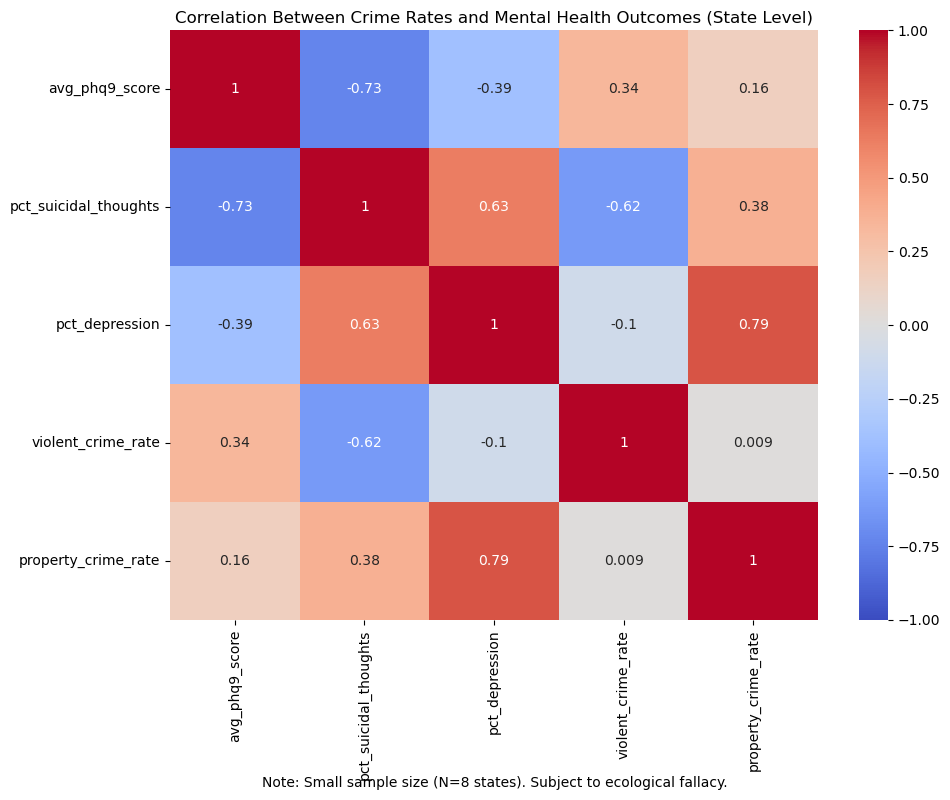

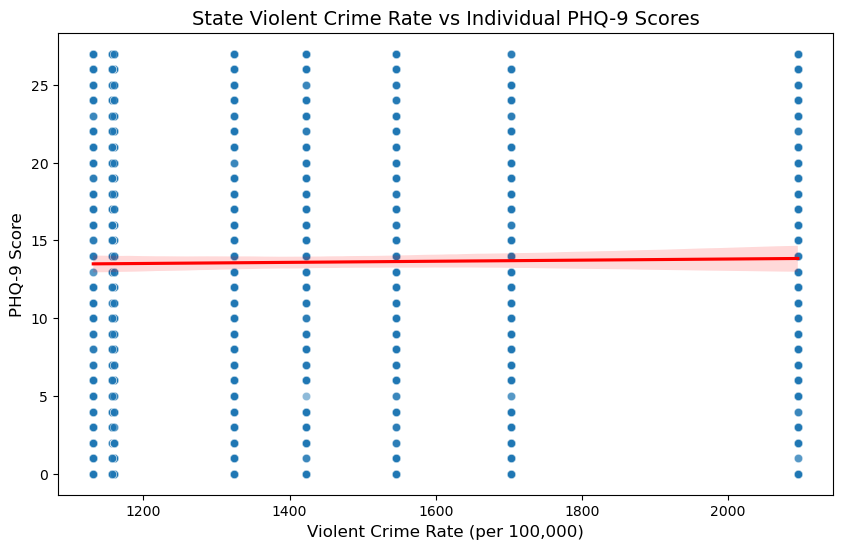


--- Interpretation of Results ---

Research Question 1: Is regional safety negatively associated with mental health outcomes?
Hypothesis 1: Higher crime rates -> poorer mental health (higher PHQ-9 scores)

Regression Results with Cluster-Robust Standard Errors:
1. Violent Crime Rate effect: coefficient = 0.0003, p-value = 0.2368
   FINDING: No significant association between violent crime rates and PHQ-9 scores
   CONCLUSION: No evidence supporting H1 (violent crime)

2. Property Crime Rate effect: coefficient = 0.0001, p-value = 0.1971
   FINDING: No significant association between property crime rates and PHQ-9 scores
   CONCLUSION: No evidence supporting H1 (property crime)

States included in the regression analysis:
state
PA    261
IL    240
WA    240
FL    227
CA    221
TX    219
OH    214
NY    211
Name: count, dtype: int64

STRENGTHS: This analysis accounts for the nested structure of individuals within states
through cluster-robust standard errors, controls for individual-lev

In [25]:
# First make sure data types are correct
Individual_mlm_data['has_college_education'] = Individual_mlm_data['has_college_education'].astype(int)
Individual_mlm_data['gender_concept_id'] = Individual_mlm_data['gender_concept_id'].astype(int)

# Alternative: OLS with cluster-robust standard errors
import statsmodels.formula.api as smf

# Violent crime model
ols_violent = smf.ols('phq9_score ~ state_violent_crime + age + C(gender_concept_id) + has_college_education', 
                      data=Individual_mlm_data).fit(cov_type='cluster', 
                                                  cov_kwds={'groups': Individual_mlm_data['state']})
print("\nOLS Results with Cluster-Robust SE (Violent Crime -> PHQ-9):")
print(ols_violent.summary())

# Property crime model
ols_property = smf.ols('phq9_score ~ state_property_crime + age + C(gender_concept_id) + has_college_education', 
                      data=Individual_mlm_data).fit(cov_type='cluster', 
                                                  cov_kwds={'groups': Individual_mlm_data['state']})
print("\nOLS Results with Cluster-Robust SE (Property Crime -> PHQ-9):")
print(ols_property.summary())

# Let's continue with the visualization and interpretation
import matplotlib.pyplot as plt
import seaborn as sns

# 1. State-level correlation
# Add full state names to mental_health_df
mental_health_df['state_name'] = mental_health_df['state'].map(state_mapping)

# Try a left join to see if we can include more states
crime_mental_health_left = pd.merge(mental_health_df, crime_df,
                                 left_on='state_name', right_on='State', how='left')

print(f"\nNumber of states with mental health data: {len(mental_health_df)}")
print(f"Number of states after left join: {len(crime_mental_health_left)}")
print("States with missing crime data (if any):")
missing_crime_states = crime_mental_health_left[crime_mental_health_left['violent_crime_rate'].isnull()]['state_name']
print(missing_crime_states if not missing_crime_states.empty else "None")

# Create a cleaner dataset for analysis by dropping rows with missing crime data
crime_mental_health_clean_revised = crime_mental_health_left.dropna(subset=['violent_crime_rate', 'property_crime_rate'])
print(f"Revised number of states for ecological analysis: {len(crime_mental_health_clean_revised)}")

# Calculate correlations with all mental health variables
correlation_matrix = crime_mental_health_clean_revised[['avg_phq9_score', 
                                                      'pct_suicidal_thoughts', 
                                                      'pct_depression',
                                                      'violent_crime_rate', 
                                                      'property_crime_rate']].corr()

print("\nCorrelation Matrix (State-Level):")
print(correlation_matrix)

# Add a note about ecological fallacy
print("\nNote: The above correlations are based on state-level aggregates (N={}) ".format(len(crime_mental_health_clean_revised)) + 
      "and should be interpreted with caution due to the risk of ecological fallacy. " +
      "Please prioritize the regression results for inference.")

# Visualizations
# 1. State-level correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Crime Rates and Mental Health Outcomes (State Level)')
plt.figtext(0.5, 0.01, 
           f'Note: Small sample size (N={len(crime_mental_health_clean_revised)} states). ' +
           'Subject to ecological fallacy.', 
           ha='center', fontsize=10)
plt.tight_layout()
plt.savefig('crime_mental_health_correlation.png')
plt.show()

# 2. Individual-level PHQ-9 vs crime scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='state_violent_crime', y='phq9_score', data=Individual_mlm_data, alpha=0.5)
sns.regplot(x='state_violent_crime', y='phq9_score', data=Individual_mlm_data, scatter=False, color='red')
plt.title('State Violent Crime Rate vs Individual PHQ-9 Scores', fontsize=14)
plt.xlabel('Violent Crime Rate (per 100,000)', fontsize=12)
plt.ylabel('PHQ-9 Score', fontsize=12)
plt.savefig('individual_crime_mental_health.png', dpi=300)
plt.show()

# Extract key coefficients and p-values from the regression results
violent_crime_coef = ols_violent.params['state_violent_crime']
violent_crime_pval = ols_violent.pvalues['state_violent_crime']

property_crime_coef = ols_property.params['state_property_crime']
property_crime_pval = ols_property.pvalues['state_property_crime']

print("\n--- Interpretation of Results ---")
print("\nResearch Question 1: Is regional safety negatively associated with mental health outcomes?")
print("Hypothesis 1: Higher crime rates -> poorer mental health (higher PHQ-9 scores)")

print("\nRegression Results with Cluster-Robust Standard Errors:")
print(f"1. Violent Crime Rate effect: coefficient = {violent_crime_coef:.4f}, p-value = {violent_crime_pval:.4f}")
if violent_crime_pval < 0.05:
    if violent_crime_coef > 0:
        print("   FINDING: Higher violent crime rates are significantly associated with higher PHQ-9 scores (worse mental health)")
        print("   CONCLUSION: Evidence supports H1 (violent crime)")
    else:
        print("   FINDING: Higher violent crime rates are significantly associated with lower PHQ-9 scores (better mental health)")
        print("   CONCLUSION: Evidence contradicts H1 (violent crime)")
else:
    print("   FINDING: No significant association between violent crime rates and PHQ-9 scores")
    print("   CONCLUSION: No evidence supporting H1 (violent crime)")

print(f"\n2. Property Crime Rate effect: coefficient = {property_crime_coef:.4f}, p-value = {property_crime_pval:.4f}")
if property_crime_pval < 0.05:
    if property_crime_coef > 0:
        print("   FINDING: Higher property crime rates are significantly associated with higher PHQ-9 scores (worse mental health)")
        print("   CONCLUSION: Evidence supports H1 (property crime)")
    else:
        print("   FINDING: Higher property crime rates are significantly associated with lower PHQ-9 scores (better mental health)")
        print("   CONCLUSION: Evidence contradicts H1 (property crime)")
else:
    print("   FINDING: No significant association between property crime rates and PHQ-9 scores")
    print("   CONCLUSION: No evidence supporting H1 (property crime)")

# Check which states we have in the final dataset
print("\nStates included in the regression analysis:")
state_counts = Individual_mlm_data['state'].value_counts()
print(state_counts)

print("\nSTRENGTHS: This analysis accounts for the nested structure of individuals within states")
print("through cluster-robust standard errors, controls for individual-level factors,")
print("and avoids ecological fallacy.")
print(f"SAMPLE: {len(Individual_mlm_data)} individuals across {len(state_counts)} states.")

print("\nLIMITATIONS:")
print("1. Cross-sectional design cannot establish causality")
print("2. Limited to states with available crime and mental health data")
print("3. May not have captured all relevant control variables")

States with both mental health and education data: 8
  state  avg_phq9_score  pct_bachelors_or_higher
0    TX       14.036530                27.867744
1    NY       14.023697                23.440883
2    WA       13.829167                30.341775
3    OH       13.747664                28.055847
4    CA       13.547511                26.918808

State-Level Correlations (Educational Attainment vs. Mental Health):
PHQ-9 Score vs. % Bachelor's or higher: r = 0.274, p = 0.511
% Suicidal Thoughts vs. % Bachelor's or higher: r = 0.043, p = 0.920
% Depression vs. % Bachelor's or higher: r = -0.111, p = 0.793


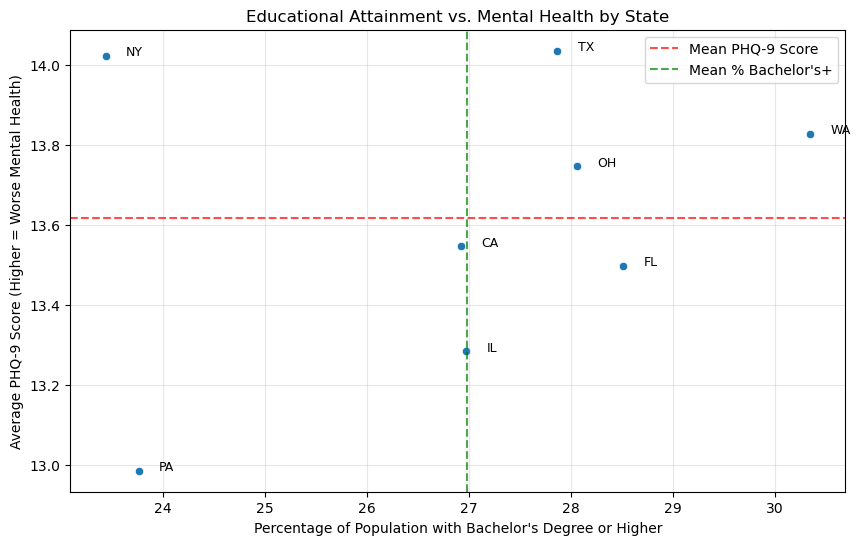


Number of individuals with state education data: 1833

Regression Results (State Education Level -> PHQ-9):
                            OLS Regression Results                            
Dep. Variable:             phq9_score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5386
Date:                Tue, 08 Apr 2025   Prob (F-statistic):              0.713
Time:                        11:24:16   Log-Likelihood:                -6421.3
No. Observations:                1833   AIC:                         1.285e+04
Df Residuals:                    1828   BIC:                         1.288e+04
Df Model:                           4                                         
Covariance Type:              cluster                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
----

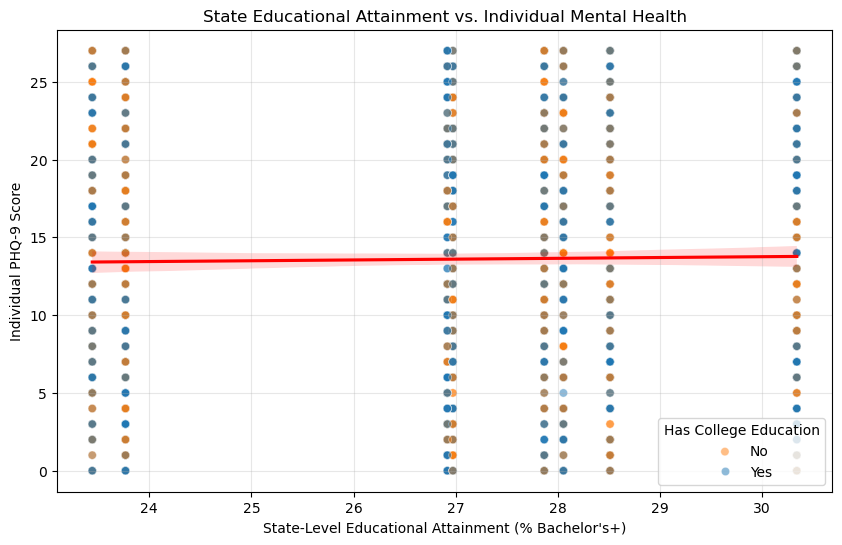

         Current function value: 0.000000
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.692816
         Iterations 3

Logistic Regression Results (State Education Level -> Suicidal Thoughts):
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       15.8135      5.249      3.013      0.003       5.525      26.102
C(gender_concept_id)[T.8532]     0.0835      0.037      2.245      0.025       0.011       0.156
state_edu_attainment             0.3364      0.196      1.720      0.085      -0.047       0.720
age                              0.0717      0.001    113.188      0.000       0.070       0.073
has_college_education            0.0907      0.068      1.337      0.181      -0.042       0.224

Logistic Regression Results (State Education Level -> Depression Diagnosis):


c:\Users\shj4015\.conda\envs\myenv\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\shj4015\.conda\envs\myenv\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\shj4015\.conda\envs\myenv\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\shj4015\.conda\envs\myenv\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSep

In [26]:
# RQ2/H2 Analysis: Does higher educational attainment correlate with better mental health outcomes?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats

# Create the state mapping (full name to abbreviation)
state_name_to_abbrev = {v: k for k, v in state_mapping.items()}

# 1. Merge educational attainment data with mental health data
# First, prepare the education data for merging
education_state_level = education_df.copy()
education_state_level['state_abbrev'] = education_state_level['state'].map(state_name_to_abbrev)

# Merge with mental health data
edu_mental_health = pd.merge(
    mental_health_df,
    education_state_level[['state_abbrev', 'pct_bachelors_or_higher']],
    left_on='state',
    right_on='state_abbrev',
    how='inner'
)

print(f"States with both mental health and education data: {len(edu_mental_health)}")
print(edu_mental_health[['state', 'avg_phq9_score', 'pct_bachelors_or_higher']].head())

# 2. Calculate Pearson correlation between educational attainment and mental health metrics
corr_phq9_edu = stats.pearsonr(
    edu_mental_health['pct_bachelors_or_higher'], 
    edu_mental_health['avg_phq9_score']
)
corr_suicidal_edu = stats.pearsonr(
    edu_mental_health['pct_bachelors_or_higher'], 
    edu_mental_health['pct_suicidal_thoughts']
)
corr_depression_edu = stats.pearsonr(
    edu_mental_health['pct_bachelors_or_higher'], 
    edu_mental_health['pct_depression']
)

print("\nState-Level Correlations (Educational Attainment vs. Mental Health):")
print(f"PHQ-9 Score vs. % Bachelor's or higher: r = {corr_phq9_edu[0]:.3f}, p = {corr_phq9_edu[1]:.3f}")
print(f"% Suicidal Thoughts vs. % Bachelor's or higher: r = {corr_suicidal_edu[0]:.3f}, p = {corr_suicidal_edu[1]:.3f}")
print(f"% Depression vs. % Bachelor's or higher: r = {corr_depression_edu[0]:.3f}, p = {corr_depression_edu[1]:.3f}")

# 3. Visualization of state-level relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pct_bachelors_or_higher', y='avg_phq9_score', data=edu_mental_health)
for i, row in edu_mental_health.iterrows():
    plt.text(row['pct_bachelors_or_higher']+0.2, row['avg_phq9_score'], row['state'], fontsize=9)
plt.axhline(y=edu_mental_health['avg_phq9_score'].mean(), color='red', linestyle='--', alpha=0.7, label='Mean PHQ-9 Score')
plt.axvline(x=edu_mental_health['pct_bachelors_or_higher'].mean(), color='green', linestyle='--', alpha=0.7, label='Mean % Bachelor\'s+')
plt.xlabel('Percentage of Population with Bachelor\'s Degree or Higher')
plt.ylabel('Average PHQ-9 Score (Higher = Worse Mental Health)')
plt.title('Educational Attainment vs. Mental Health by State')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('education_vs_mental_health_state.png')
plt.show()

# 4. Individual-level analysis
# Add state educational attainment to individual data
edu_mapping = education_state_level.set_index('state_abbrev')['pct_bachelors_or_higher'].to_dict()
Individual_mlm_data['state_edu_attainment'] = Individual_mlm_data['state'].map(edu_mapping)

# Drop individuals with missing state education data
individual_data_with_edu = Individual_mlm_data.dropna(subset=['state_edu_attainment'])
print(f"\nNumber of individuals with state education data: {len(individual_data_with_edu)}")

# 5. Individual-level regression analysis
# Model 1: State education -> PHQ-9 (with controls)
model1 = smf.ols(
    'phq9_score ~ state_edu_attainment + age + C(gender_concept_id) + has_college_education', 
    data=individual_data_with_edu
).fit(cov_type='cluster', cov_kwds={'groups': individual_data_with_edu['state']})

print("\nRegression Results (State Education Level -> PHQ-9):")
print(model1.summary())

# 6. Visualization of individual-level relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='state_edu_attainment', y='phq9_score', 
                hue='has_college_education', 
                data=individual_data_with_edu, 
                alpha=0.5)
sns.regplot(x='state_edu_attainment', y='phq9_score', 
           data=individual_data_with_edu, 
           scatter=False, color='red')
plt.xlabel('State-Level Educational Attainment (% Bachelor\'s+)')
plt.ylabel('Individual PHQ-9 Score')
plt.title('State Educational Attainment vs. Individual Mental Health')
plt.legend(title='Has College Education', labels=['No', 'Yes'])
plt.grid(alpha=0.3)
plt.savefig('education_vs_mental_health_individual.png')
plt.show()

# 7. Binary outcome models (suicidal thoughts, depression diagnosis)
# Logistic regression for suicidal thoughts
model2 = smf.logit(
    'has_suicidal_thoughts ~ state_edu_attainment + age + C(gender_concept_id) + has_college_education', 
    data=individual_data_with_edu
).fit(cov_type='cluster', cov_kwds={'groups': individual_data_with_edu['state']})

# Logistic regression for depression diagnosis
model3 = smf.logit(
    'has_depression ~ state_edu_attainment + age + C(gender_concept_id) + has_college_education', 
    data=individual_data_with_edu
).fit(cov_type='cluster', cov_kwds={'groups': individual_data_with_edu['state']})

print("\nLogistic Regression Results (State Education Level -> Suicidal Thoughts):")
print(model2.summary().tables[1])  # Print just the coefficient table

print("\nLogistic Regression Results (State Education Level -> Depression Diagnosis):")
print(model3.summary().tables[1])  # Print just the coefficient table

# 8. Interaction effect: Does individual education modify the effect of state education?
model4 = smf.ols(
    'phq9_score ~ state_edu_attainment * has_college_education + age + C(gender_concept_id)', 
    data=individual_data_with_edu
).fit(cov_type='cluster', cov_kwds={'groups': individual_data_with_edu['state']})

print("\nInteraction Model Results:")
print(model4.summary().tables[1])  # Print just the coefficient table

# 9. Interpretation of results
print("\n--- Interpretation of Results ---")
print("\nResearch Question 2: Is higher educational attainment positively associated with mental health outcomes?")
print("Hypothesis 2: Regions with higher levels of educational attainment will have residents with better mental health outcomes.")

print("\nState-Level Correlation Results:")
if corr_phq9_edu[1] < 0.05:
    if corr_phq9_edu[0] < 0:
        print(f"FINDING: States with higher educational attainment have significantly lower PHQ-9 scores (better mental health)")
        print(f"CONCLUSION: Evidence supports H2 at the state level (r = {corr_phq9_edu[0]:.3f}, p = {corr_phq9_edu[1]:.3f})")
    else:
        print(f"FINDING: States with higher educational attainment have significantly higher PHQ-9 scores (worse mental health)")
        print(f"CONCLUSION: Evidence contradicts H2 at the state level (r = {corr_phq9_edu[0]:.3f}, p = {corr_phq9_edu[1]:.3f})")
else:
    print(f"FINDING: No significant correlation between state educational attainment and PHQ-9 scores")
    print(f"CONCLUSION: No evidence supporting H2 at the state level (r = {corr_phq9_edu[0]:.3f}, p = {corr_phq9_edu[1]:.3f})")

print("\nMultilevel Analysis Results:")
state_edu_coef = model1.params['state_edu_attainment']
state_edu_pval = model1.pvalues['state_edu_attainment']
individual_edu_coef = model1.params['has_college_education']
individual_edu_pval = model1.pvalues['has_college_education']

print(f"1. State Educational Attainment effect: coefficient = {state_edu_coef:.4f}, p-value = {state_edu_pval:.4f}")
if state_edu_pval < 0.05:
    if state_edu_coef < 0:
        print(f"   FINDING: Higher state educational attainment is significantly associated with lower PHQ-9 scores (better mental health)")
        print(f"   CONCLUSION: Evidence supports H2 (state level)")
    else:
        print(f"   FINDING: Higher state educational attainment is significantly associated with higher PHQ-9 scores (worse mental health)")
        print(f"   CONCLUSION: Evidence contradicts H2 (state level)")
else:
    print(f"   FINDING: No significant association between state educational attainment and PHQ-9 scores")
    print(f"   CONCLUSION: No evidence supporting H2 (state level)")

print(f"\n2. Individual College Education effect: coefficient = {individual_edu_coef:.4f}, p-value = {individual_edu_pval:.4f}")
if individual_edu_pval < 0.05:
    if individual_edu_coef < 0:
        print(f"   FINDING: Having a college education is significantly associated with lower PHQ-9 scores (better mental health)")
        print(f"   CONCLUSION: Evidence supports a positive effect of education at the individual level")
    else:
        print(f"   FINDING: Having a college education is significantly associated with higher PHQ-9 scores (worse mental health)")
        print(f"   CONCLUSION: Evidence contradicts a positive effect of education at the individual level")
else:
    print(f"   FINDING: No significant association between individual college education and PHQ-9 scores")
    print(f"   CONCLUSION: No evidence supporting an effect of education at the individual level")

# Check interaction effect
interaction_coef = model4.params['state_edu_attainment:has_college_education']
interaction_pval = model4.pvalues['state_edu_attainment:has_college_education']

print(f"\n3. Interaction Effect: coefficient = {interaction_coef:.4f}, p-value = {interaction_pval:.4f}")
if interaction_pval < 0.05:
    print(f"   FINDING: The effect of state educational attainment on mental health significantly differs")
    print(f"   between individuals with and without college education")
    if interaction_coef < 0:
        print(f"   CONCLUSION: College-educated individuals benefit more from living in high-education states")
    else:
        print(f"   CONCLUSION: Non-college-educated individuals benefit more from living in high-education states")
else:
    print(f"   FINDING: No significant interaction between state and individual educational attainment")
    print(f"   CONCLUSION: The effect of state educational attainment on mental health does not")
    print(f"   significantly differ between individuals with and without college education")

print("\nSTRENGTHS: This analysis separates the effects of state-level and individual-level education,")
print("controls for demographic factors, and accounts for the nested structure of the data")
print("through cluster-robust standard errors.")
print(f"SAMPLE: {len(individual_data_with_edu)} individuals across {len(individual_data_with_edu['state'].unique())} states")

print("\nLIMITATIONS:")
print("1. Cross-sectional design cannot establish causality")
print("2. Limited to states with available education and mental health data")
print("3. May not fully account for reverse causality (mental health affecting education)")